In [1]:
import numpy as np
import pandas as pd
import missingno as msno

In [2]:
acs_2011 = pd.read_csv('data/acs/acs_5yr_2011_ep.csv')
acs_2012 = pd.read_csv('data/acs/acs_5yr_2012_ep.csv')
acs_2013 = pd.read_csv('data/acs/acs_5yr_2013_ep.csv')
acs_2014 = pd.read_csv('data/acs/acs_5yr_2014_ep.csv')
acs_2015 = pd.read_csv('data/acs/acs_5yr_2015_ep.csv')
acs_2016 = pd.read_csv('data/acs/acs_5yr_2016_ep.csv')
acs_2017 = pd.read_csv('data/acs/acs_5yr_2017_ep.csv')
acs_2018 = pd.read_csv('data/acs/acs_5yr_2018_ep.csv')

In [3]:
1720/215

8.0

In [4]:
# number of zipcodes in each
file_list = [acs_2011, acs_2012, acs_2013, acs_2014, acs_2015, acs_2016, acs_2017, acs_2018]
for idx, df in enumerate(file_list):
    print(len(df['geo_id'].unique()))

215
215
215
215
215
215
215
215


In [5]:
file_list = [acs_2011, acs_2012, acs_2013, acs_2014, acs_2015, acs_2016, acs_2017, acs_2018]
for idx, df in enumerate(file_list):
    df['year'] = '201' + str(idx +1)

In [6]:
acs_master = pd.concat(file_list, axis=0, ignore_index=True)

In [7]:
acs_master.shape

(1720, 38)

In [8]:
acs_master.head(30)

,geo_id,male_pop,female_pop,median_age,white_pop,not_us_citizen_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,...,owner_occupied_housing_units,aggregate_travel_time_to_work,commuters_by_public_transportation,high_school_diploma,bachelors_degree,employed_pop,unemployed_pop,pop_in_labor_force,armed_forces,year
0,77494.0,27525.0,28283.0,33.9,36390.0,6630.0,3717.0,6882.0,7852.0,22.0,...,15334.0,767465.0,672.0,NaN,NaN,25437.0,1097.0,26534.0,0.0,2011
1,77449.0,42721.0,43581.0,30.4,26902.0,13354.0,16260.0,4283.0,37646.0,95.0,...,20957.0,1298185.0,430.0,NaN,NaN,40441.0,3404.0,43947.0,102.0,2011
2,77084.0,46032.0,47973.0,31.0,31830.0,16612.0,11738.0,7598.0,41394.0,134.0,...,19018.0,1455665.0,722.0,NaN,NaN,47413.0,2819.0,50269.0,37.0,2011
3,78130.0,27967.0,30044.0,34.9,34095.0,3003.0,1029.0,380.0,21862.0,75.0,...,14335.0,625300.0,10.0,NaN,NaN,27357.0,1596.0,29112.0,159.0,2011
4,77573.0,35000.0,34099.0,34.5,47475.0,3347.0,5272.0,3972.0,11042.0,60.0,...,18800.0,986235.0,276.0,NaN,NaN,35679.0,1688.0,37586.0,219.0,2011
5,77584.0,31604.0,34152.0,33.8,29529.0,5412.0,12610.0,10989.0,11393.0,142.0,...,18672.0,1010905.0,8.0,NaN,NaN,33588.0,1657.0,35345.0,100.0,2011
6,78613.0,31725.0,32176.0,33.9,44923.0,3086.0,3410.0,3801.0,10220.0,185.0,...,16985.0,769160.0,223.0,NaN,NaN,32226.0,2282.0,34552.0,44.0,2011
7,77433.0,22546.0,22416.0,30.9,22674.0,4624.0,6381.0,3113.0,12160.0,75.0,...,11833.0,727985.0,262.0,NaN,NaN,21753.0,1209.0,22984.0,22.0,2011
8,75052.0,42636.0,45011.0,32.0,27150.0,9311.0,20007.0,8477.0,30001.0,364.0,...,20405.0,1222895.0,169.0,NaN,NaN,44291.0,3854.0,48291.0,146.0,2011
9,77429.0,34606.0,35866.0,33.5,47343.0,4573.0,4429.0,4617.0,12225.0,227.0,...,18884.0,1088210.0,688.0,NaN,NaN,35345.0,1145.0,36498.0,8.0,2011


<AxesSubplot:>

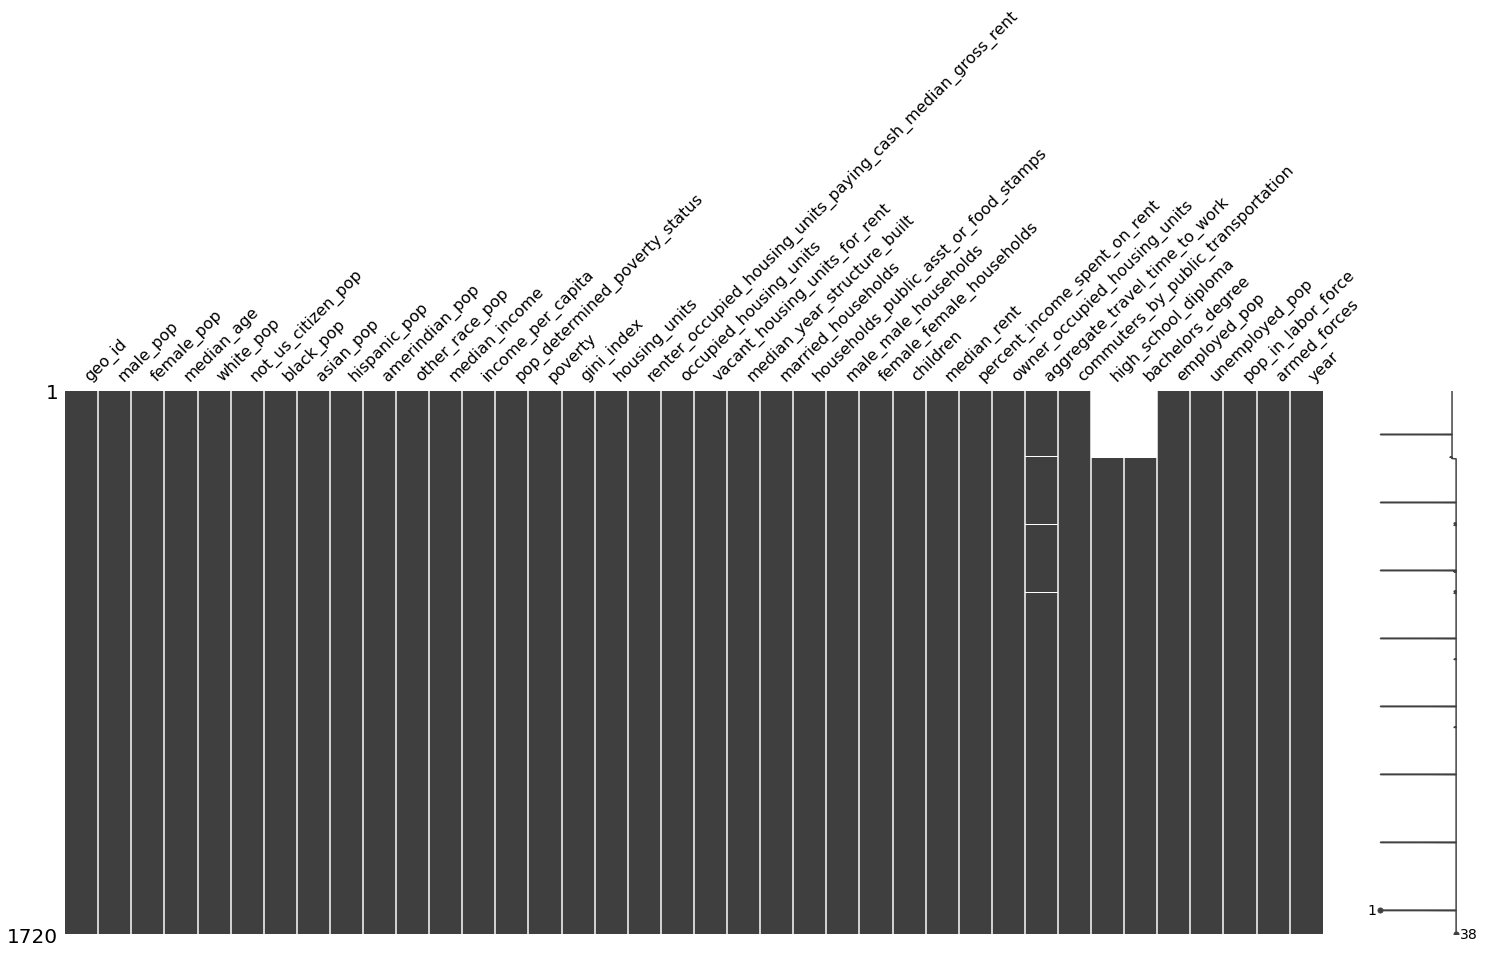

In [9]:
msno.matrix(acs_master)

In [10]:
acs_master.columns

Index(['geo_id', 'male_pop', 'female_pop', 'median_age', 'white_pop',
       'not_us_citizen_pop', 'black_pop', 'asian_pop', 'hispanic_pop',
       'amerindian_pop', 'other_race_pop', 'median_income',
       'income_per_capita', 'pop_determined_poverty_status', 'poverty',
       'gini_index', 'housing_units',
       'renter_occupied_housing_units_paying_cash_median_gross_rent',
       'occupied_housing_units', 'vacant_housing_units_for_rent',
       'median_year_structure_built', 'married_households',
       'households_public_asst_or_food_stamps', 'male_male_households',
       'female_female_households', 'children', 'median_rent',
       'percent_income_spent_on_rent', 'owner_occupied_housing_units',
       'aggregate_travel_time_to_work', 'commuters_by_public_transportation',
       'high_school_diploma', 'bachelors_degree', 'employed_pop',
       'unemployed_pop', 'pop_in_labor_force', 'armed_forces', 'year'],
      dtype='object')

<AxesSubplot:>

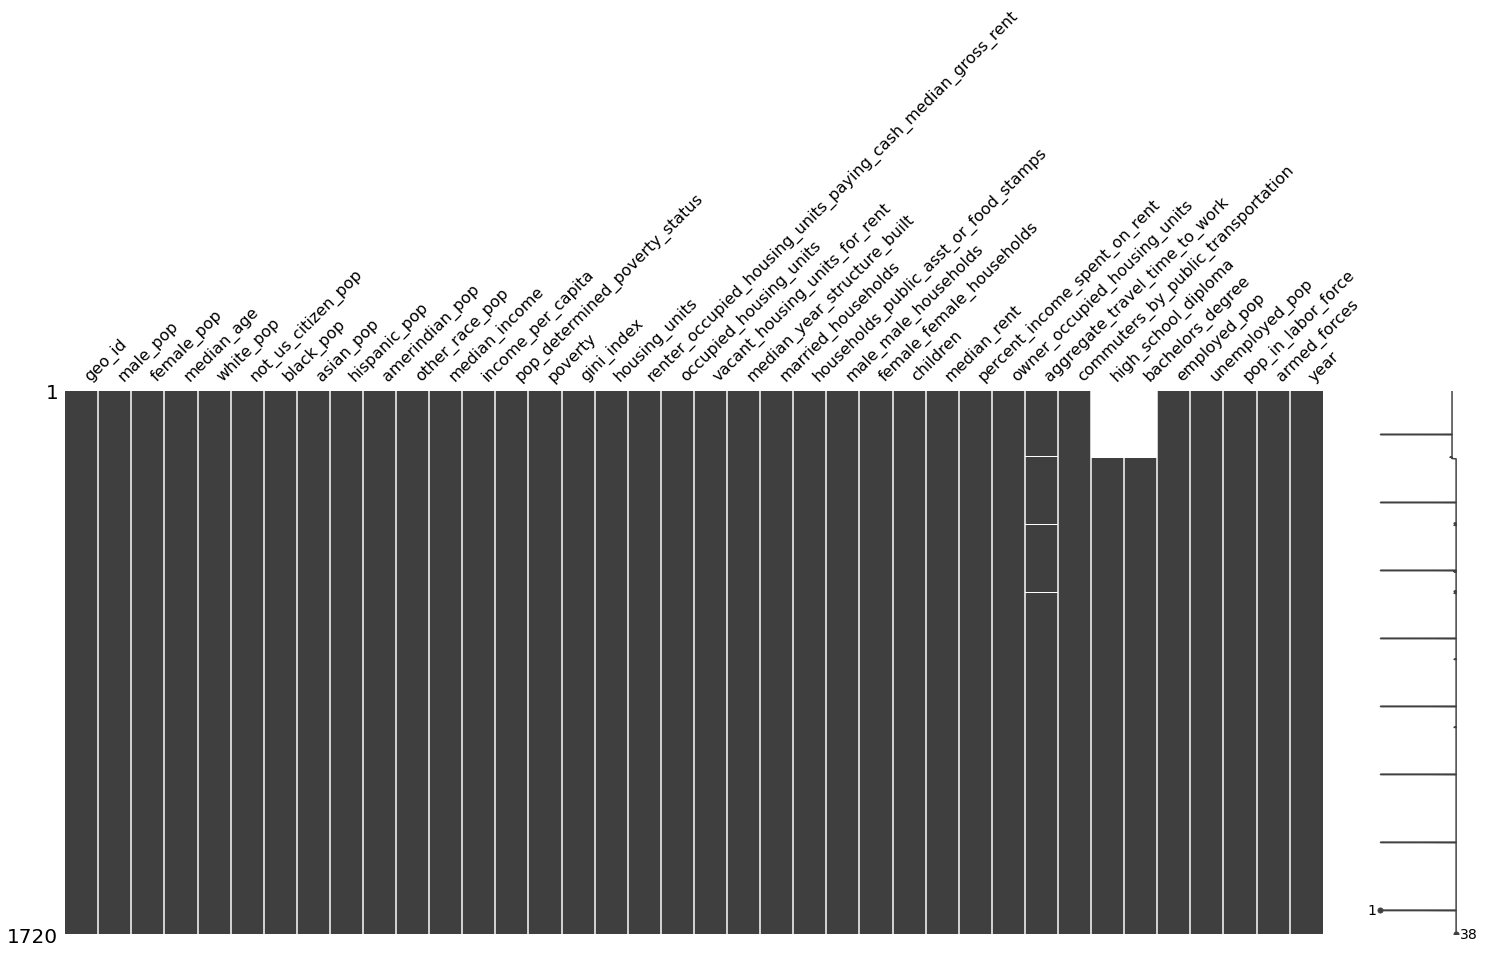

In [11]:
# acs_master = acs_master.drop(columns=['pop_never_married', 'pop_now_married', 'pop_now_married_1',
#        'pop_separated', 'pop_widowed', 'pop_divorced'], axis=1)
msno.matrix(acs_master)

In [12]:
acs_master = acs_master.dropna(thresh=10)
acs_master[acs_master.isnull().all(axis=1)]

,geo_id,male_pop,female_pop,median_age,white_pop,not_us_citizen_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,...,owner_occupied_housing_units,aggregate_travel_time_to_work,commuters_by_public_transportation,high_school_diploma,bachelors_degree,employed_pop,unemployed_pop,pop_in_labor_force,armed_forces,year


In [13]:
acs_master['year'] = acs_master['year'].astype('int')

In [14]:
acs_master

,geo_id,male_pop,female_pop,median_age,white_pop,not_us_citizen_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,...,owner_occupied_housing_units,aggregate_travel_time_to_work,commuters_by_public_transportation,high_school_diploma,bachelors_degree,employed_pop,unemployed_pop,pop_in_labor_force,armed_forces,year
0,77494.0,27525.0,28283.0,33.9,36390.0,6630.0,3717.0,6882.0,7852.0,22.0,...,15334.0,767465.0,672.0,NaN,NaN,25437.0,1097.0,26534.0,0.0,2011
1,77449.0,42721.0,43581.0,30.4,26902.0,13354.0,16260.0,4283.0,37646.0,95.0,...,20957.0,1298185.0,430.0,NaN,NaN,40441.0,3404.0,43947.0,102.0,2011
2,77084.0,46032.0,47973.0,31.0,31830.0,16612.0,11738.0,7598.0,41394.0,134.0,...,19018.0,1455665.0,722.0,NaN,NaN,47413.0,2819.0,50269.0,37.0,2011
3,78130.0,27967.0,30044.0,34.9,34095.0,3003.0,1029.0,380.0,21862.0,75.0,...,14335.0,625300.0,10.0,NaN,NaN,27357.0,1596.0,29112.0,159.0,2011
4,77573.0,35000.0,34099.0,34.5,47475.0,3347.0,5272.0,3972.0,11042.0,60.0,...,18800.0,986235.0,276.0,NaN,NaN,35679.0,1688.0,37586.0,219.0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,78756.0,4114.0,4209.0,35.6,6284.0,285.0,169.0,414.0,1185.0,0.0,...,2026.0,101110.0,394.0,623.0,2978.0,5828.0,77.0,5905.0,0.0,2018
1716,78721.0,5902.0,6590.0,34.6,2981.0,1453.0,3078.0,224.0,5999.0,16.0,...,2273.0,139230.0,322.0,1888.0,1877.0,6559.0,442.0,7011.0,10.0,2018
1717,78252.0,7393.0,4760.0,29.9,2473.0,833.0,576.0,109.0,8687.0,77.0,...,2028.0,106245.0,43.0,1198.0,802.0,4135.0,433.0,4711.0,143.0,2018
1718,79936.0,55631.0,56724.0,31.4,10151.0,11573.0,2546.0,1209.0,97470.0,201.0,...,23975.0,1124970.0,229.0,12887.0,11744.0,53101.0,3128.0,57587.0,1358.0,2018


In [15]:
# Create list of dates from 01-01-2012 to most recent in covid data
dates_list = []
new_date = pd.to_datetime('01-01-2011')
end_date = pd.to_datetime('08-01-2021')

while new_date != end_date:
    dates_list.append(new_date)
    new_date += pd.DateOffset(months=1)
dates = pd.DataFrame(dates_list)
dates.columns = ['Time']
dates['year'] = dates['Time'].dt.year
# dates['year'] = dates['year'].astype('int')

In [16]:
dates

,Time,year
0,2011-01-01,2011
1,2011-02-01,2011
2,2011-03-01,2011
3,2011-04-01,2011
4,2011-05-01,2011
...,...,...
122,2021-03-01,2021
123,2021-04-01,2021
124,2021-05-01,2021
125,2021-06-01,2021


In [17]:
## merge ACS with dates list
acs_master = acs_master.merge(dates, how='left', on='year')
acs_master = acs_master.rename(columns={'geo_id':'zip_code'})
acs_master

,zip_code,male_pop,female_pop,median_age,white_pop,not_us_citizen_pop,black_pop,asian_pop,hispanic_pop,amerindian_pop,...,aggregate_travel_time_to_work,commuters_by_public_transportation,high_school_diploma,bachelors_degree,employed_pop,unemployed_pop,pop_in_labor_force,armed_forces,year,Time
0,77494.0,27525.0,28283.0,33.9,36390.0,6630.0,3717.0,6882.0,7852.0,22.0,...,767465.0,672.0,NaN,NaN,25437.0,1097.0,26534.0,0.0,2011,2011-01-01
1,77494.0,27525.0,28283.0,33.9,36390.0,6630.0,3717.0,6882.0,7852.0,22.0,...,767465.0,672.0,NaN,NaN,25437.0,1097.0,26534.0,0.0,2011,2011-02-01
2,77494.0,27525.0,28283.0,33.9,36390.0,6630.0,3717.0,6882.0,7852.0,22.0,...,767465.0,672.0,NaN,NaN,25437.0,1097.0,26534.0,0.0,2011,2011-03-01
3,77494.0,27525.0,28283.0,33.9,36390.0,6630.0,3717.0,6882.0,7852.0,22.0,...,767465.0,672.0,NaN,NaN,25437.0,1097.0,26534.0,0.0,2011,2011-04-01
4,77494.0,27525.0,28283.0,33.9,36390.0,6630.0,3717.0,6882.0,7852.0,22.0,...,767465.0,672.0,NaN,NaN,25437.0,1097.0,26534.0,0.0,2011,2011-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20539,79912.0,39086.0,41178.0,34.0,17942.0,11075.0,1456.0,2555.0,56560.0,236.0,...,823750.0,570.0,6074.0,14742.0,37419.0,2376.0,40421.0,626.0,2018,2018-08-01
20540,79912.0,39086.0,41178.0,34.0,17942.0,11075.0,1456.0,2555.0,56560.0,236.0,...,823750.0,570.0,6074.0,14742.0,37419.0,2376.0,40421.0,626.0,2018,2018-09-01
20541,79912.0,39086.0,41178.0,34.0,17942.0,11075.0,1456.0,2555.0,56560.0,236.0,...,823750.0,570.0,6074.0,14742.0,37419.0,2376.0,40421.0,626.0,2018,2018-10-01
20542,79912.0,39086.0,41178.0,34.0,17942.0,11075.0,1456.0,2555.0,56560.0,236.0,...,823750.0,570.0,6074.0,14742.0,37419.0,2376.0,40421.0,626.0,2018,2018-11-01


In [18]:
acs_master.to_csv('acs_master11to18_clean.csv')